<a href="https://colab.research.google.com/github/yasinsoylu1997/SGDClassifier/blob/main/SGDClassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.feature_extraction.text import CountVectorizer
count=CountVectorizer()

In [4]:
data=pd.read_csv("hepsiburada.csv")

In [5]:
def sentiments(df):
  if df['yildizSayisi'] > 3.9:
    return '1'
  elif df['yildizSayisi'] <= 3.0:
    return '0'
data['sentiment'] = data.apply(sentiments, axis=1)

In [9]:
data

,yildizSayisi,yorum,yorumLike,yorumDislike,sentiment
0,5,I bought this mouse for my home computer and i...,14,4,1
1,5,Ürünü yaklaşık 3 aydır kullanıyorum. Hem ergon...,6,0,1
2,5,"Teknolojiden çok anlayan biri değilim, sadece ...",1,0,1
3,5,Perfect,3,0,1
4,5,"Ürünün yapısı oldukça ergonomik, işte kullanma...",2,0,1
...,...,...,...,...,...
479237,1,Bana hiç iyi gelmedi dökülmeyi durdurmadığı gi...,4,4,0
479238,5,Ürünler bir gün içinde elimdeydi.teşekkürler..,3,6,1
479239,1,Arkadaşlar ben aldım 1 ay kullandım saç dökülm...,10,27,0
479240,3,Saç dökülmesi konusunda herhangi bir şampuanda...,10,3,0


In [8]:
data.sentiment = data.sentiment.astype('int64')


In [10]:
data.rename(columns = {'sentiment':'label', 'yorum':'text',}, inplace = True)

In [12]:
data=data[["text","label"]]

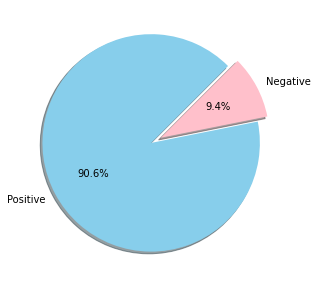

In [13]:
fig=plt.figure(figsize=(5,5))
colors=["skyblue",'pink']
pos=data[data['label']==1]
neg=data[data['label']==0]
ck=[pos['label'].count(),neg['label'].count()]
legpie=plt.pie(ck,labels=["Positive","Negative"],
                 autopct ='%1.1f%%', 
                 shadow = True,
                 colors = colors,
                 startangle = 45,
                 explode=(0, 0.1))

In [14]:
df=["Hey Jude, refrain Dont carry the world upon your shoulders For well you know that its a fool Who plays it cool By making his world a little colder Na-na-na,a, na Na-na-na, na"]
bag=count.fit_transform(df)
print(count.get_feature_names())

['by', 'carry', 'colder', 'cool', 'dont', 'fool', 'for', 'hey', 'his', 'it', 'its', 'jude', 'know', 'little', 'making', 'na', 'plays', 'refrain', 'shoulders', 'that', 'the', 'upon', 'well', 'who', 'world', 'you', 'your']


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [15]:
print(bag.toarray())


[[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 8 1 1 1 1 1 1 1 1 2 1 1]]


In [16]:
import re
def preprocessor(text):
             text=re.sub('<[^>]*>','',text)
             emojis=re.findall('(?::|;|=)(?:-)?(?:\)|\(|D|P)',text)
             text=re.sub('[\W]+',' ',text.lower()) +\
                ' '.join(emojis).replace('-','')
             return text 

In [17]:
preprocessor(data.loc[0,'text'][-50:])

'ly logitech and everest it s two different brands '

In [18]:
preprocessor("<a> this is :(  aweomee wohhhh :)")


' this is aweomee wohhhh :( :)'

In [19]:
data['text']=data['text'].apply(preprocessor)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [20]:
from nltk.stem.porter import PorterStemmer

porter=PorterStemmer()

In [21]:
def tokenizer(text):
        return text.split()

In [24]:
def tokenizer_porter(text):
    return [porter.stem(word) for word in text.split()]

In [25]:
tokenizer("Haters love Hating as they Hate")


['Haters', 'love', 'Hating', 'as', 'they', 'Hate']

In [26]:
tokenizer_porter("Haters love Hating as they Hate")


['hater', 'love', 'hate', 'as', 'they', 'hate']

In [27]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [28]:
from nltk.corpus import stopwords
stop=stopwords.words('turkish')

Positive words are as follows


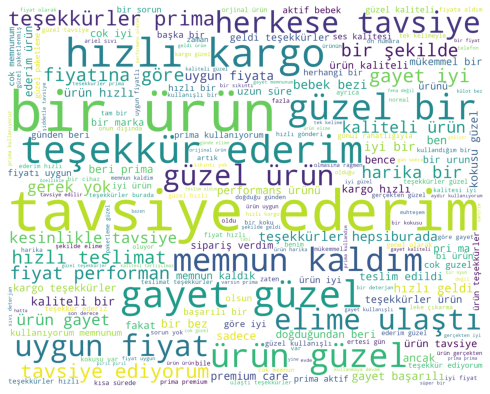

Negative words are as follows


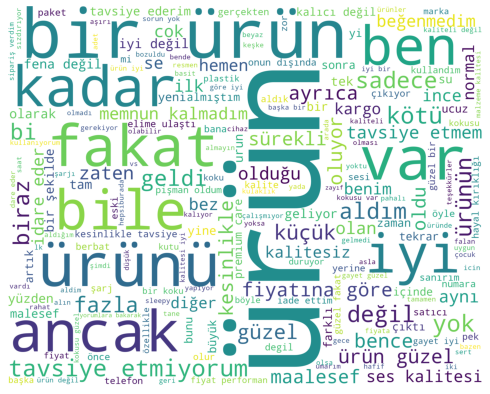

In [29]:
from wordcloud import WordCloud
positivedata = data[ data['label'] == 1]
positivedata =positivedata['text']
negdata = data[data['label'] == 0]
negdata= negdata['text']

def wordcloud_draw(data, color = 'white'):
    words = ' '.join(data)
    cleaned_word = " ".join([word for word in words.split()
                              if(word!='movie' and word!='film')
                            ])
    wordcloud = WordCloud(stopwords=stop,
                      background_color=color,
                      width=2500,
                      height=2000
                     ).generate(cleaned_word)
    plt.figure(1,figsize=(10, 7))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()
    
print("Positive words are as follows")
wordcloud_draw(positivedata,'white')
print("Negative words are as follows")
wordcloud_draw(negdata)

In [30]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf=TfidfVectorizer(strip_accents=None,lowercase=False,preprocessor=None,tokenizer=tokenizer_porter,use_idf=True,norm='l2',smooth_idf=True)

In [31]:
y=data.label.values
x=tfidf.fit_transform(data.text)

In [32]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(x,y,random_state=1,test_size=0.2,shuffle=False)

In [40]:
from sklearn.linear_model import LogisticRegressionCV

clf=LogisticRegressionCV(cv=5,scoring='accuracy',random_state=0,n_jobs=-1,verbose=1,max_iter=1000).fit(X_train,y_train)

y_pred = clf.predict(X_test)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed: 17.3min finished


In [37]:
from sklearn import metrics

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9052154952060011


In [38]:
from sklearn.linear_model import SGDClassifier
clf= SGDClassifier(loss='hinge', penalty='l2', alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=1000, tol=0.001, shuffle=True, verbose=0, epsilon=0.1, n_jobs=None, random_state=None, learning_rate='optimal', eta0=0.0, power_t=0.5, early_stopping=False, validation_fraction=0.1, n_iter_no_change=5, class_weight=None, warm_start=False, average=False)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [39]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


Accuracy: 0.8640048409477408
